# This project demonstrates how to build a simple and effective Convolutional Neural Network (CNN) using TensorFlow to classify handwritten digits from the MNIST dataset.

In [1]:
# import all necessary libraries
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D,MaxPooling2D, Flatten

In [2]:
# import training and testing data
(xtrain, ytrain), (xtest, ytest) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Data Understanding

In [3]:
# shape of training data
print(f"input variable shape: {xtrain.shape}")
print(f"target variable shape: {ytrain.shape}")

input variable shape: (60000, 28, 28)
target variable shape: (60000,)


In [4]:
# shape of testing data
print(f"input variable shape: {xtest.shape}")
print(f"target variable shape: {ytest.shape}")

input variable shape: (10000, 28, 28)
target variable shape: (10000,)


Data Preprocessing

In [5]:
# normalize data
xtrain = xtrain.astype("float32")/255.0
xtest = xtest.astype("float32")/255.0

In [6]:
# reshape data into (28, 28, 1)
xtrain = xtrain.reshape(-1, 28, 28, 1)
xtest = xtest.reshape(-1, 28, 28, 1)

Model Building

In [7]:
# creating sequential model
model = Sequential()

# add convolutional layers
model.add(Conv2D(32, kernel_size=(3,3), activation="relu", input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, kernel_size=(3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

# add flatten layer
model.add(Flatten())

# add fully dense layer
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation="softmax")) # output layer for 10 labels

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
# compile model
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

Training Model

In [10]:
# training CNN model
history = model.fit(xtrain, ytrain, epochs=10, batch_size = 32, verbose=1, validation_data=(xtest, ytest))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.8637 - loss: 0.4270 - val_accuracy: 0.9858 - val_loss: 0.0439
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.9744 - loss: 0.0849 - val_accuracy: 0.9885 - val_loss: 0.0322
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9844 - loss: 0.0557 - val_accuracy: 0.9915 - val_loss: 0.0258
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9869 - loss: 0.0457 - val_accuracy: 0.9906 - val_loss: 0.0263
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9893 - loss: 0.0342 - val_accuracy: 0.9929 - val_loss: 0.0237
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9905 - loss: 0.0305 - val_accuracy: 0.9908 - val_loss: 0.0274
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9919 - loss: 0.0267 - val_accuracy: 0.9921 - val_loss: 0.0278
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9925 - loss: 0.0252 

Model Evaluation

In [11]:
# calculate loss and accuracy
loss, accuracy = model.evaluate(xtest, ytest)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9927 - loss: 0.0259


In [12]:
# loss and accuracy of model
print(f"Log loss: {loss}")
print(f"accuracy: {accuracy}")

Log loss: 0.022893069311976433
accuracy: 0.9940000176429749


Performance Visualization

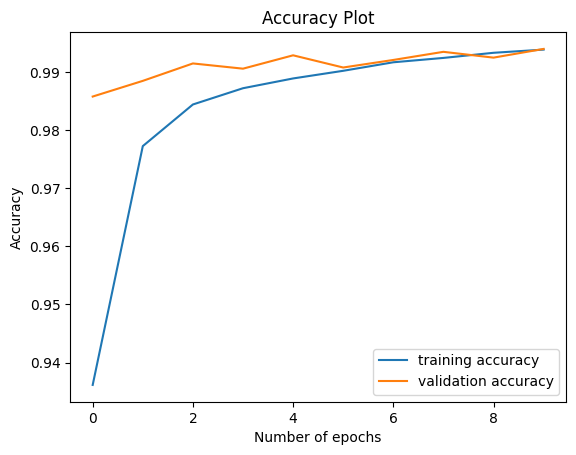

In [13]:
plt.plot(history.history["accuracy"], label = "training accuracy")
plt.plot(history.history["val_accuracy"], label = "validation accuracy")
plt.xlabel("Number of epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy Plot")
plt.legend()
plt.show()

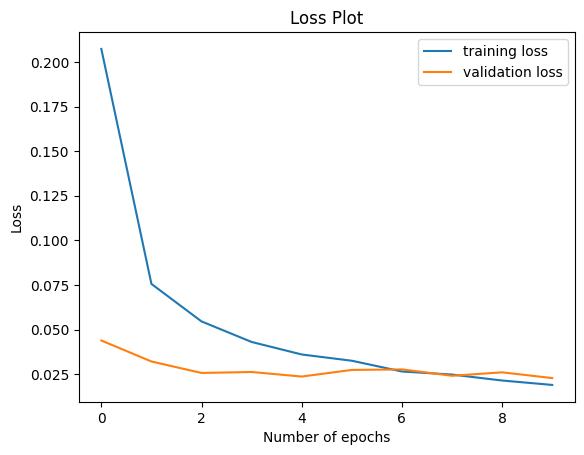

In [14]:
plt.plot(history.history["loss"], label = "training loss")
plt.plot(history.history["val_loss"], label = "validation loss")
plt.xlabel("Number of epochs")
plt.ylabel("Loss")
plt.title("Loss Plot")
plt.legend()
plt.show()

Result- Trained Convolutional Neural Network performs very well on MNIST dataset.